<a href="https://colab.research.google.com/github/hodfernando/SenaiMotores/blob/main/AvaliacaoSENAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Acesso ao Gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls '/content/drive/MyDrive/Colab Notebooks/Estudo de caso SENAI/'

AvaliacaoSENAI.ipynb  Dados_Avaliação_P1_2024_1/


In [4]:
import os
import numpy as np

In [5]:
if __name__ == "__main__":
    if 'google.colab' in str(get_ipython()):
        pasta_projeto = "/content/drive/MyDrive/Colab Notebooks/Estudo de caso SENAI/"  # Atualize conforme necessário
        pasta_raw_data = os.path.join(pasta_projeto, 'Dados_Avaliação_P1_2024_1')

In [6]:
    classes_file = os.path.join(pasta_raw_data, 'Classes.npy')
    dados_1_file = os.path.join(pasta_raw_data, 'Dados_1.npy')
    dados_2_file = os.path.join(pasta_raw_data, 'Dados_2.npy')
    dados_3_file = os.path.join(pasta_raw_data, 'Dados_3.npy')
    dados_4_file = os.path.join(pasta_raw_data, 'Dados_4.npy')
    dados_5_file = os.path.join(pasta_raw_data, 'Dados_5.npy')

    # Carregando o arquivo com allow_pickle=True
    classes = np.load(classes_file, allow_pickle=True)
    dados_1 = np.load(dados_1_file, allow_pickle=True)
    dados_2 = np.load(dados_2_file, allow_pickle=True)
    dados_3 = np.load(dados_3_file, allow_pickle=True)
    dados_4 = np.load(dados_4_file, allow_pickle=True)
    dados_5 = np.load(dados_5_file, allow_pickle=True)

In [7]:
    classes.shape

(50000, 1)

In [8]:
    classes.dtype

dtype('O')

In [9]:
    dados_1.shape

(50000, 201)

In [10]:
    dados_5[3]

array([ -7.09489426,  51.40803185,  76.68264969,   5.08569903,
        22.56412671,  76.02775795,  17.43420823,   3.15828294,
        23.28279938,  22.44466201, 100.57744529,  11.01204935,
        62.99514438,   0.90142616,  -2.96800321,  57.16989153,
        77.85684654,  79.13080014,  29.05694767,  41.82079928,
        45.34397952,  73.85746897, -13.40211394,  25.40634949,
        62.62898459,  20.7752729 ,  26.485716  ,  96.08425963,
        22.53582703,  75.57733351,   6.44118943,  37.10147692,
        58.90407081,  18.31764643,  35.15005549,  83.08447732,
        97.91793079,  26.51953273,  71.03327112,  45.81823349,
        11.95167664,  40.99780999,  33.20224923,  38.48292572,
        25.80607994,  39.9711347 ,  91.27038824,  43.9913758 ,
        20.61705147,  19.10939162,  13.23888847,  69.83213093,
        -0.55156097,  21.16963894, 118.53971062,  38.17399292,
        39.5033194 ,  23.33102463, 112.07741113, 104.11184549,
        19.33569446,  14.20927371,  -0.31405045,  12.06

In [11]:
    dados_1 = dados_1[:, :-1]
    dados_2 = dados_2[:, :-1]
    dados_3 = dados_3[:, :-1]

In [12]:
    # Verificando os novos formatos dos arrays
    print("Novo shape de dados_1:", dados_1.shape)
    print("Novo shape de dados_2:", dados_2.shape)
    print("Novo shape de dados_3:", dados_3.shape)
    print("Novo shape de dados_4:", dados_4.shape)
    print("Novo shape de dados_5:", dados_5.shape)


Novo shape de dados_1: (50000, 200)
Novo shape de dados_2: (50000, 200)
Novo shape de dados_3: (50000, 200)
Novo shape de dados_4: (50000, 200)
Novo shape de dados_5: (50000, 200)


In [13]:
    classes_unicas = np.unique(classes)
    numero_de_classes = len(classes_unicas)
    print("Número de classes diferentes:", numero_de_classes)

Número de classes diferentes: 5


In [14]:
    dados_completos = np.concatenate((dados_1, dados_2, dados_3, dados_4, dados_5), axis=1)

In [15]:
    dados_completos.shape

(50000, 1000)

In [16]:
from sklearn.model_selection import train_test_split

def dividir_dados(dados, classes, proporcao_teste=0.2, random_state=None):
    # Dividir os dados em conjuntos de treinamento e teste estratificados
    X_treino, X_teste, y_treino, y_teste = train_test_split(dados, classes,
                                                              test_size=proporcao_teste,
                                                              stratify=classes,
                                                              random_state=random_state)

    return X_treino, X_teste, y_treino, y_teste

In [17]:
    X_treino, X_teste, y_treino, y_teste = dividir_dados(dados_completos, classes, proporcao_teste=0.2, random_state=42)

In [18]:
    X_treino.shape

(40000, 1000)

In [22]:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline

    # Definir hiperparâmetros
    num_trees = 100
    tree_depth = 100
    max_features = 100
    min_samples_leaf = 3
    criterion='entropy'

    # Criar um pipeline com imputação de valores ausentes e treinamento do modelo
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('model', RandomForestClassifier(n_estimators=num_trees,
                                        criterion=criterion,
                                        max_depth=tree_depth,
                                        min_samples_leaf=min_samples_leaf,
                                        max_features=max_features,
                                        random_state=42))
    ])

    # Treinar o modelo
    pipeline.fit(X_treino, y_treino)

    # Avaliar o modelo
    acuracia = pipeline.score(X_teste, y_teste)
    print("Acurácia do modelo:", acuracia)


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Acurácia do modelo: 0.4709


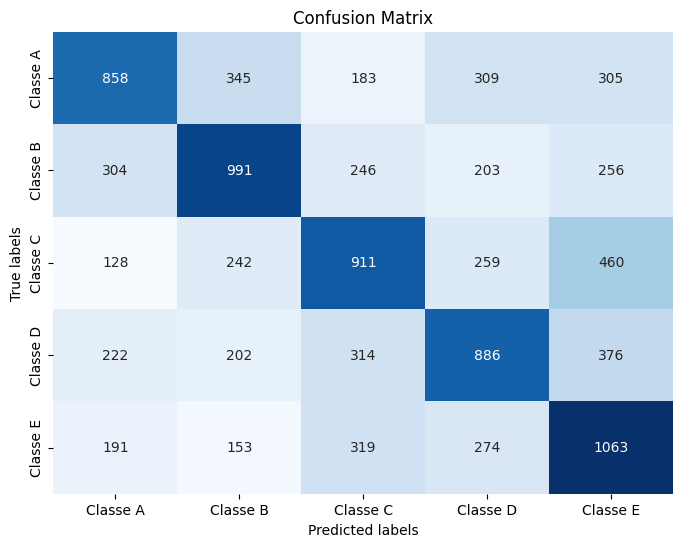

In [30]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    # Prever os rótulos para o conjunto de teste
    y_pred = pipeline.predict(X_teste)

    # Converter os rótulos para arrays numpy unidimensionais
    y_teste = np.array(y_teste).flatten()
    y_pred = np.array(y_pred).flatten()

    # Obter os rótulos únicos
    labels = np.unique(np.concatenate((y_teste, y_pred)))

    # Calcular a matriz de confusão
    conf_matrix = confusion_matrix(y_teste, y_pred, labels=labels)

    # Plotar a matriz de confusão usando Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()
